# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from city import variable_name
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(cities)

Number of cities in the list: 594


In [3]:
# cities = cities[:5]

In [4]:
## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
city_data = []

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")



# # Create counters
record_count = 1
set_count = 1


# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

   # Add 1 to the record count
    record_count += 1
    #print(response)
    try:
        latitude=(response["coord"]["lat"])
        temperature=(response["main"]["temp"])
        humidity=(response["main"]["humidity"])
        cloudiness=(response["clouds"]["all"])
        wind_speed=(response["wind"]["speed"])
#         final_cities=(response["name"])
        country=(response["sys"]["country"])
        longitude=(response["coord"]["lon"])
        date=(response["dt"])
        
        city_data.append({
            "City": city.title(),
            "Lat" : latitude,
            "Lng" : longitude,
            "Humidity": humidity,
            "Temp": temperature,
            "Clouds": cloudiness,
            "Wind": wind_speed,
            "Country": country,
            "Date": date
        })
        
    
        
    
    except:
        print("This city is not in the list")        
    
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

cities_df = pd.DataFrame(city_data)
cities_df.head()

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | ribeira grande
Processing Record 3 of Set 1 | fort st. john
Processing Record 4 of Set 1 | cockburn town
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | arkhangel'sk
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | fale old settlement
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | keta
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | anadyr
Processing Record 16 of Set 1 | wailua homesteads
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | cole harbour
Processing Record 20 of Set 1 | karratha
Processing Record 21 of Set 1 | roxas
Processing Record 22 of Set 1 |

Processing Record 40 of Set 4 | konarka
Processing Record 41 of Set 4 | camana
Processing Record 42 of Set 4 | takoradi
Processing Record 43 of Set 4 | buncrana
Processing Record 44 of Set 4 | piacabucu
Processing Record 45 of Set 4 | khasab
Processing Record 46 of Set 4 | qasr-e qand
This city is not in the list
Processing Record 47 of Set 4 | gien
Processing Record 48 of Set 4 | gadzhiyevo
Processing Record 49 of Set 4 | we
This city is not in the list
Processing Record 0 of Set 5 | la foa
Processing Record 1 of Set 5 | acajutla
Processing Record 2 of Set 5 | budva
Processing Record 3 of Set 5 | cabedelo
Processing Record 4 of Set 5 | rakovski
Processing Record 5 of Set 5 | pathein
Processing Record 6 of Set 5 | margaret river
Processing Record 7 of Set 5 | st. john's
Processing Record 8 of Set 5 | weno
Processing Record 9 of Set 5 | fada
Processing Record 10 of Set 5 | sandnessjoen
Processing Record 11 of Set 5 | valdosta
Processing Record 12 of Set 5 | sarmiento
Processing Record 1

Processing Record 33 of Set 8 | port douglas
Processing Record 34 of Set 8 | marshalltown
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | sabang
Processing Record 37 of Set 8 | kulhudhuffushi
Processing Record 38 of Set 8 | manokwari
Processing Record 39 of Set 8 | beloyarskiy
Processing Record 40 of Set 8 | kataragama
This city is not in the list
Processing Record 41 of Set 8 | new norfolk
Processing Record 42 of Set 8 | lycksele
Processing Record 43 of Set 8 | paphos
Processing Record 44 of Set 8 | moyale
Processing Record 45 of Set 8 | victoria point
Processing Record 46 of Set 8 | tralee
Processing Record 47 of Set 8 | daru
Processing Record 48 of Set 8 | sur
Processing Record 49 of Set 8 | kish
Processing Record 0 of Set 9 | fort bragg
Processing Record 1 of Set 9 | ust'-kulom
Processing Record 2 of Set 9 | bikenibeu village
Processing Record 3 of Set 9 | sao jose da coroa grande
Processing Record 4 of Set 9 | lagoa
Processing Record 5 of Set 9 | khandyga
Pr

Processing Record 22 of Set 12 | kiunga
Processing Record 23 of Set 12 | xihe
Processing Record 24 of Set 12 | plastun
Processing Record 25 of Set 12 | fray luis beltran
Processing Record 26 of Set 12 | verkhovyna
Processing Record 27 of Set 12 | miracema do tocantins
Processing Record 28 of Set 12 | griffith
Processing Record 29 of Set 12 | cannonvale
Processing Record 30 of Set 12 | la gi
Processing Record 31 of Set 12 | mangai
Processing Record 32 of Set 12 | flin flon
Processing Record 33 of Set 12 | peniche
Processing Record 34 of Set 12 | westport
Processing Record 35 of Set 12 | gilgit
Processing Record 36 of Set 12 | zavety il'icha
Processing Record 37 of Set 12 | galliano
Processing Record 38 of Set 12 | dompu
Processing Record 39 of Set 12 | colonia
Processing Record 40 of Set 12 | tual
Processing Record 41 of Set 12 | little falls
Processing Record 42 of Set 12 | sinabang
Processing Record 43 of Set 12 | newquay
-----------------------------
Data Retrieval Complete      
---

In [8]:
# Display sample data
cities_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
0,Port Mathurin,-19.6833,63.4167,73,79.65,19,20.78,MU,1681846926
1,Ribeira Grande,38.5167,-28.7000,72,59.40,40,13.80,PT,1681846926
2,Fort St. John,56.2499,-120.8529,29,48.09,75,14.97,CA,1681846926
3,Cockburn Town,21.4612,-71.1419,74,78.55,30,12.19,TC,1681846926
4,Bilibino,68.0546,166.4372,88,16.27,100,3.02,RU,1681846881


In [9]:
# Export the City_Data into a csv
cities_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
cities_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
cities_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,Port Mathurin,-19.6833,63.4167,73,79.65,19,20.78,MU,1681846926
1,Ribeira Grande,38.5167,-28.7000,72,59.40,40,13.80,PT,1681846926
2,Fort St. John,56.2499,-120.8529,29,48.09,75,14.97,CA,1681846926
3,Cockburn Town,21.4612,-71.1419,74,78.55,30,12.19,TC,1681846926
4,Bilibino,68.0546,166.4372,88,16.27,100,3.02,RU,1681846881


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

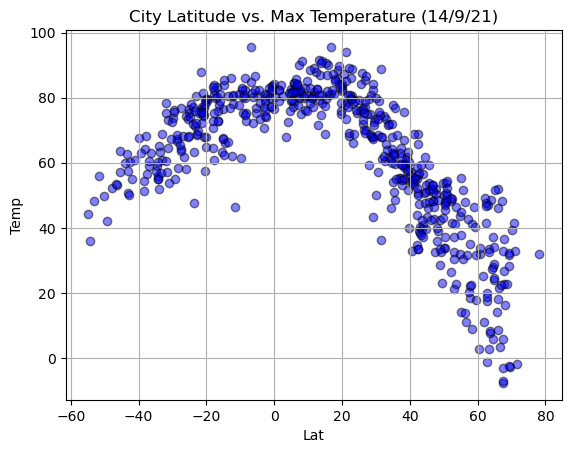

In [12]:
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs. Max Temperature (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

Temperatures seem to gradually drop the farther people move from the equator.

#### Latitude Vs. Humidity

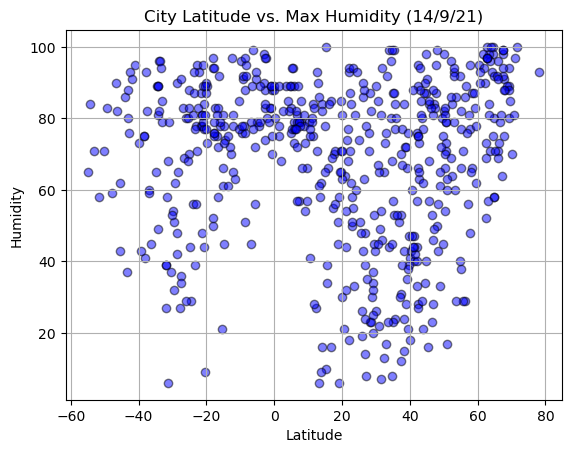

In [14]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Max Humidity (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

We can't establish any correlationship between Humidity and Latitude from this graph.

#### Latitude Vs. Cloudiness

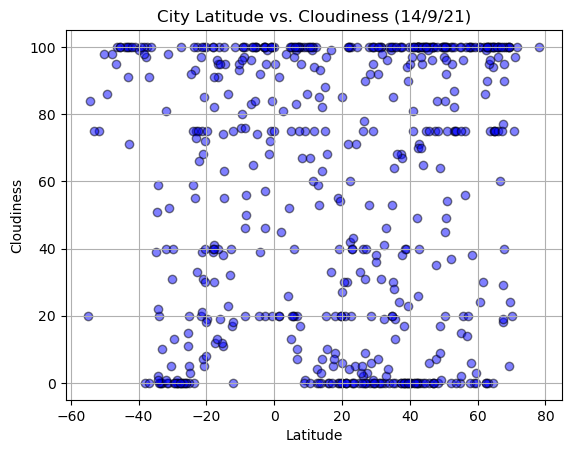

In [15]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()
# Incorporate the other graph properties
# YOUR CODE HERE

This plot does not clearly suggest any significant relationship between a city's latitude and cloudiness.

#### Latitude vs. Wind Speed Plot

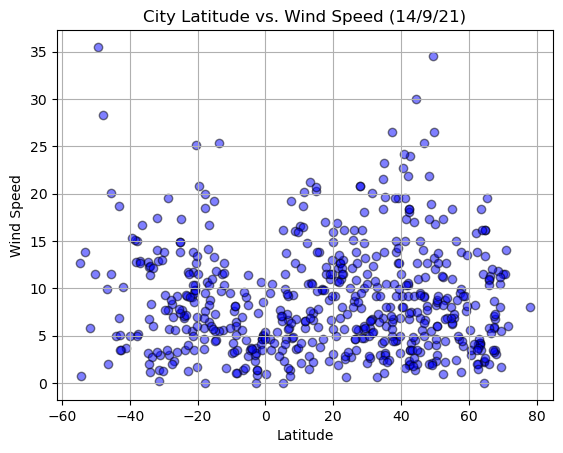

In [16]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
# Build scatter plot for latitude vs. temperature
x_values = cities_df['Lat']
y_values = cities_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs. Wind Speed (14/9/21)')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)


# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

This graph doesn't suggest any correlationship between Latitude and Wind Speed.

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_df = cities_df.loc[cities_df['Lat']>=0]

# Display sample data
northern_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
1,Ribeira Grande,38.5167,-28.7000,72,59.40,40,13.80,PT,1681846926
2,Fort St. John,56.2499,-120.8529,29,48.09,75,14.97,CA,1681846926
3,Cockburn Town,21.4612,-71.1419,74,78.55,30,12.19,TC,1681846926
4,Bilibino,68.0546,166.4372,88,16.27,100,3.02,RU,1681846881
5,Arkhangel'Sk,64.5401,40.5433,100,28.11,0,2.24,RU,1681846813


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_df = cities_df.loc[cities_df['Lat']<0]

# Display sample data
southern_df.head()

,City,Lat,Lng,Humidity,Temp,Clouds,Wind,Country,Date
City_ID,,,,,,,,,
0,Port Mathurin,-19.6833,63.4167,73,79.65,19,20.78,MU,1681846926
7,Fale Old Settlement,-9.3852,-171.2468,76,82.49,80,7.58,TK,1681846927
9,Adamstown,-25.0660,-130.1015,70,76.66,5,14.85,PN,1681846820
10,Port-Aux-Francais,-49.3500,70.2167,83,42.15,86,35.50,TF,1681846874
12,Bredasdorp,-34.5322,20.0403,89,59.02,51,3.15,ZA,1681846829


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.881081634448223


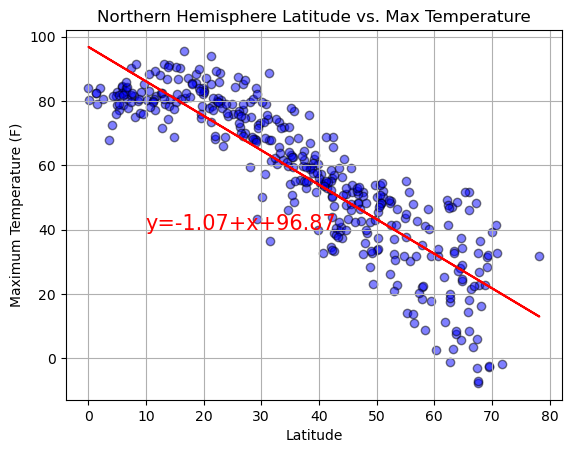

In [20]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Northern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(10,40),fontsize=15, color='r')
plt.show()

This graph shows a srong negatuve correlation between Latitide and Temperature. Because as cities in the northern hemisphere move cloer to the north pole and away from the equator, the temperature drops.

The r-value is: 0.7495381033827304


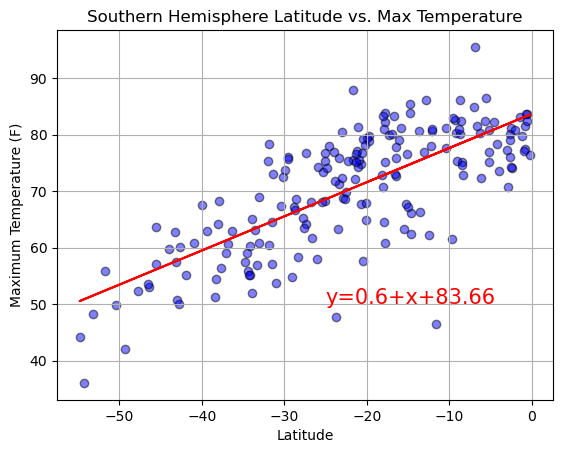

In [21]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Temp']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.title('Southern Hemisphere Latitude vs. Max Temperature')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-25,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
There seems to be a strong relationship between latitude and temperature. Maximum temperature increases as we near the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1796367727957177


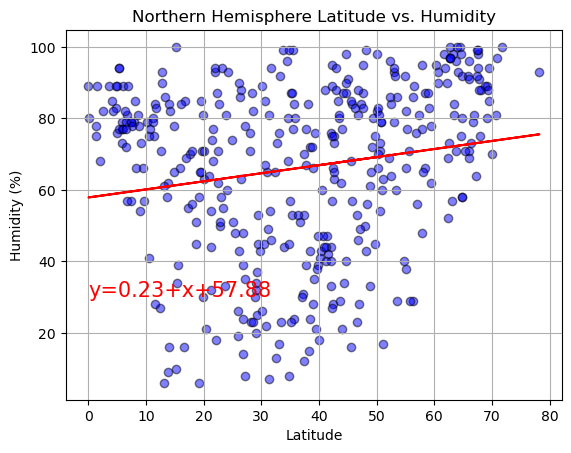

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()

There's a slight correlation between Latitude and Humidty in cities of Northern Hemisphere.

The r-value is: 0.24196436094613158


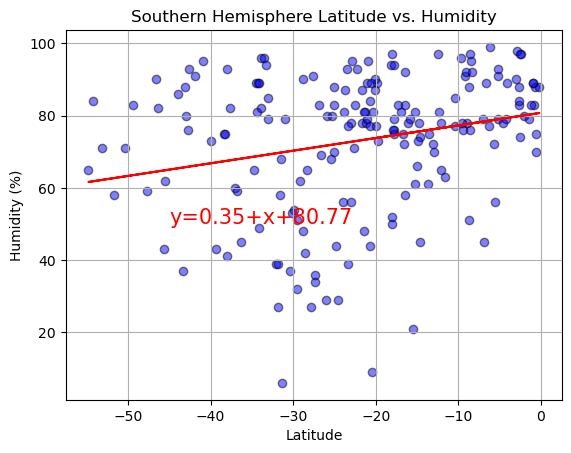

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,50),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Humidity increases as we near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1748840253534069


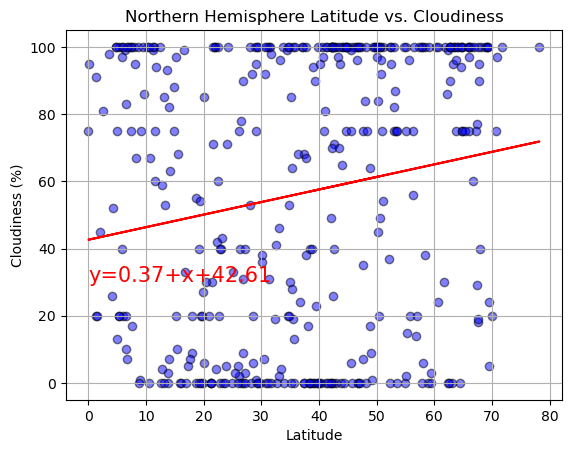

In [24]:
# Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,30),fontsize=15, color='r')
plt.show()
# YOUR CODE HERE

There seems to be a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.

The r-value is: 0.11689165537641572


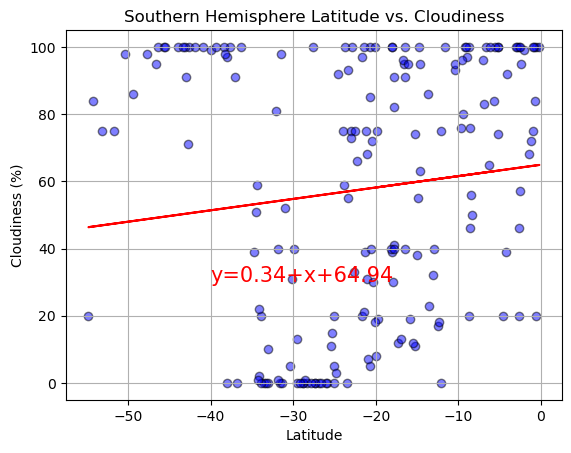

In [26]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Clouds']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-40,30),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
The cloudiness increases as we near the equator but this correation might be weak in the cities of southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.014067754491287773


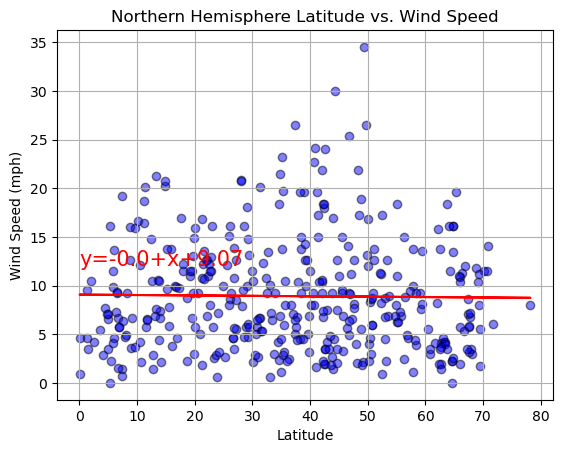

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_df['Lat']
y_values = northern_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(0,12),fontsize=15, color='r')
plt.show()

There seems to be no correlation between Latitude and Wind Speed in the cities of Northern Hemisphere

The r-value is: -0.2910926679746776


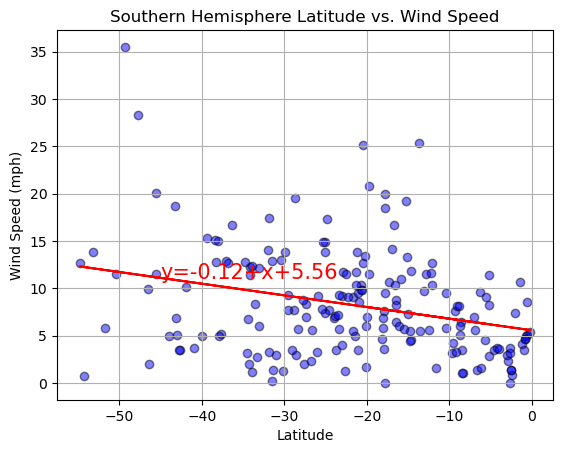

In [28]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_df['Lat']
y_values = southern_df['Wind']
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.scatter(x_values,y_values,marker='o', facecolor = 'blue', edgecolor='black', alpha=0.5)

#Draw regression line
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
print(f'The r-value is: {rvalue}')
regress_values = slope*(x_values)+intercept
plt.plot(x_values, regress_values, color = 'r')
line_eq = f'y={str(round(slope,2))}+x+{str(round(intercept,2))}'
plt.annotate(line_eq,(-45,11),fontsize=15, color='r')
plt.show()

<!-- **Discussion about the linear relationship:** YOUR RESPONSE HERE -->
Wind speed appears to be getting higher as cities are located nearer to the north, with no correlation with the equator.